# Customer Segmentation - Descriptive Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\arnol\Desktop\DataSets\Customer Segmentation Data\customer_segmentation_data.csv")
df

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

## 1. Basic Data OverView

In [4]:
column_types = df.dtypes.reset_index()
column_types.columns = ['Column Name', 'Data Type']

# Creating a new DataFrame with column names as rows and data types as columns.

df2 = column_types.T
df2.columns = df2.iloc[0]
df2 = df2[1:]

df2

Column Name,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
Data Type,int64,int64,object,object,object,object,object,int64,object,object,object,object,int64,int64,object,object,object,object,object,object


In [5]:
# Getting a count of all the different data types:

dtype_counts = df.dtypes.value_counts()
dtype_counts

object    15
int64      5
Name: count, dtype: int64

In [6]:
# Which Columns are present in the dataset.

df.columns

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')

In [7]:
df.head(3)

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [9]:
df.describe(include='object')

,Gender,Marital Status,Education Level,Geographic Information,Occupation,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
count,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503,53503
unique,2,5,5,35,9,5,2016,5,5,4,5,5,5,5,5
top,Male,Married,Associate Degree,Lakshadweep,Salesperson,policy3,03-12-2018,Chat,policy1,Group,Mail,In-Person Meeting,Weekends,German,Segment5
freq,27499,13219,12213,2140,7919,15761,173,14153,13365,18255,11887,14311,14092,14452,13976


## 2. Data Cleaning.

### Checking and Solving for Null Values and Duplicates.

In [10]:
df.isnull().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

In [11]:
df.duplicated().sum()

0

## 3. Data Transformation

In [12]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')

In [13]:
# Changing the dates separator.

df['Purchase History'] = df['Purchase History'].str.replace('/', '-')
df

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5-18-2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11-27-2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


In [14]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')

In [15]:
# Changing the name of a column name.

df.rename(columns={'Purchase History':'Purchase_Date'}, inplace=True)

In [16]:
df['Purchase_Date'].head(20)

0     04-10-2018
1     11-06-2018
2     06-05-2021
3     09-02-2018
4     09-10-2018
5      9-19-2020
6     07-04-2021
7     11-01-2021
8      9-20-2020
9      4-24-2020
10     3-20-2022
11    05-10-2021
12    10-28-2018
13    12-28-2018
14    09-05-2020
15    08-06-2021
16    11-16-2018
17    10-15-2023
18    10-26-2020
19    07-11-2019
Name: Purchase_Date, dtype: object

In [17]:
df.head(5)

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase_Date,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


# Descriptive Analysis

### Age Distribution

In [18]:
# Calculating the Mean, Median, Mode and Standard deviation.

#Mean
age_mean = df['Age'].mean()

#Median.
age_median = df['Age'].median()

#Mode.
age_mode = df['Age'].mode()

#Standard deviation.
age_std = df['Age'].std()

print("Mean age:", age_mean)
print("Median age:", age_median)
print("Mode age:", age_mode.values)  # Converting to values to print as a single value.
print("Standard Deviation of Age:", age_std)

Mean age: 44.140945367549485
Median age: 43.0
Mode age: [69]
Standard Deviation of Age: 15.07948618895543


C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

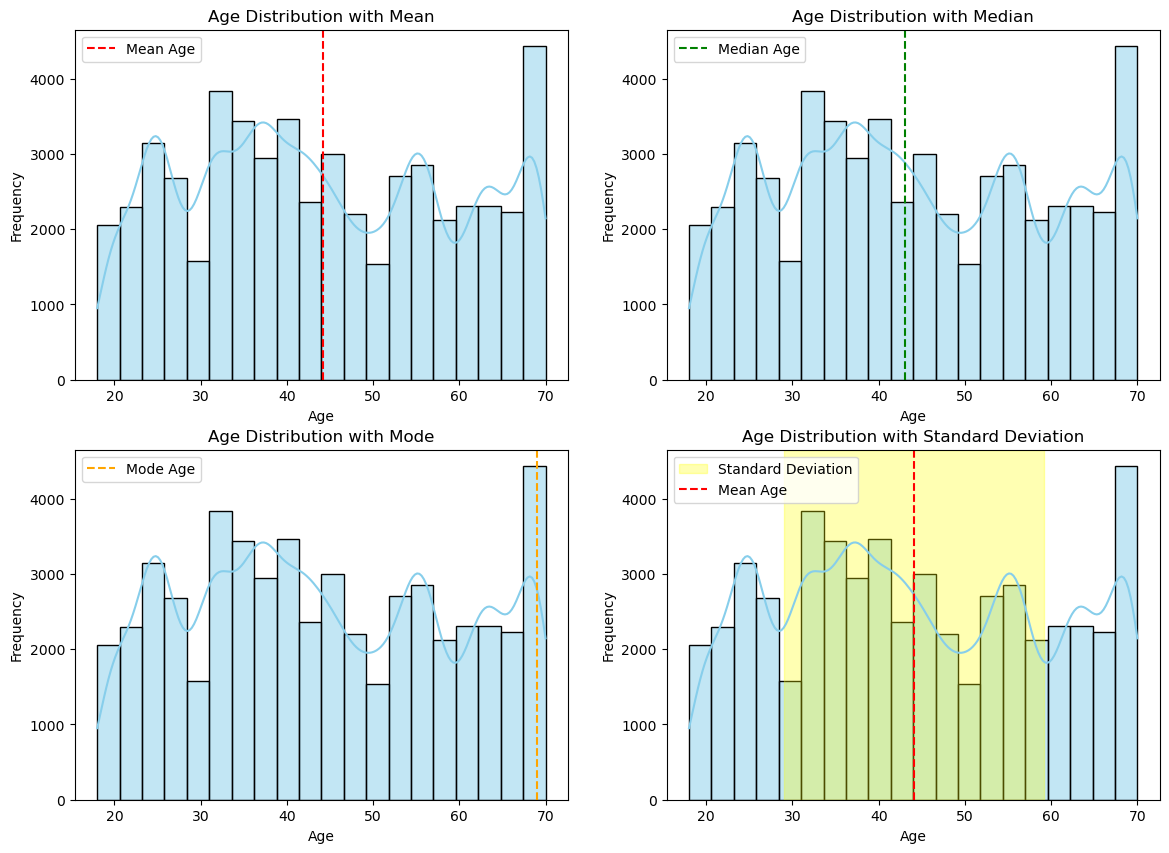

In [19]:
# Setting up the figure and axes.
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#Visualizing the mean.
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue', ax=axes[0, 0])
axes[0, 0].axvline(x=age_mean, color='red', linestyle='--', label='Mean Age')
axes[0, 0].set_title('Age Distribution with Mean')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

#Visualizing median.
sns.histplot(df['Age'], bins=20, kde=True, color='Skyblue', ax=axes[0, 1])
axes[0, 1].axvline(x=age_median, color='green', linestyle='--', label='Median Age')
axes[0, 1].set_title('Age Distribution with Median')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

#Visualizing the mode.
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', ax=axes[1, 0])
for mode in age_mode.values:
    axes[1, 0].axvline(x=mode, color='orange', linestyle='--', label='Mode Age')
axes[1, 0].set_title('Age Distribution with Mode')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

#Visualizing the standard deviation.
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', ax=axes[1, 1])
axes[1, 1].axvspan(age_mean - age_std, age_mean + age_std, color='yellow', alpha=0.3, label='Standard Deviation')
axes[1,1].axvline(x=age_mean, color='red', linestyle='--', label='Mean Age')
axes[1, 1].set_title('Age Distribution with Standard Deviation')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

### Age Group Distribution Analysis.

In [20]:
#Creating the age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, np.inf]
labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '90+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculating the descriptive statistics for each age group.
age_group_stats = df.groupby('Age Group')['Age'].agg(['mean', 'median', lambda x: x.mode().values[0] if len(x.mode()) > 0 else np.nan, 'std'])

C:\Users\arnol\AppData\Local\Temp\ipykernel_3888\879649338.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('Age Group')['Age'].agg(['mean', 'median', lambda x: x.mode().values[0] if len(x.mode()) > 0 else np.nan, 'std'])


C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\arnol\anaconda3\Lib\site-packages

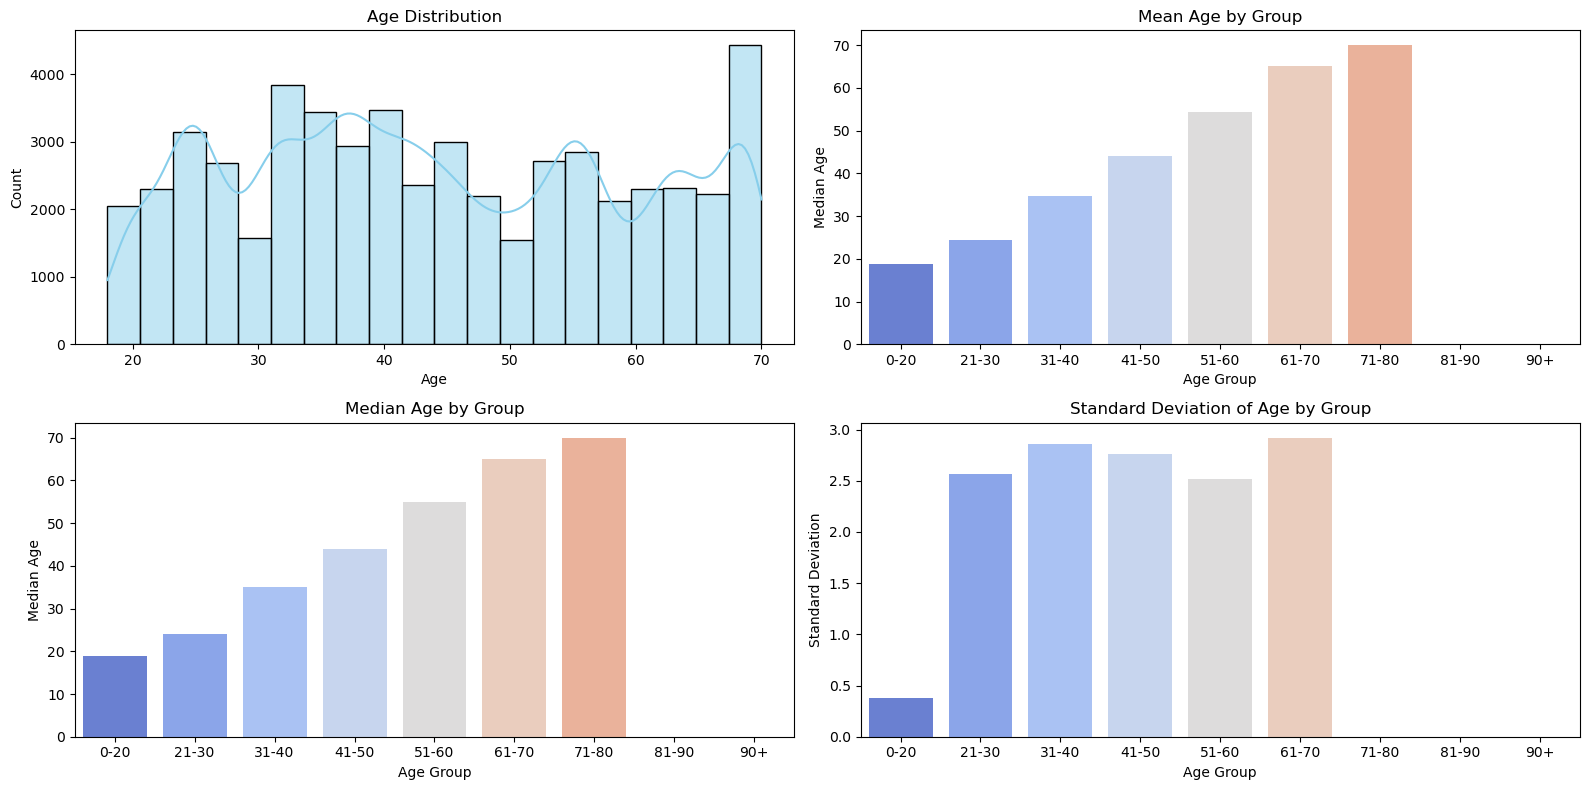

In [21]:
#visualize age Groups
plt.figure(figsize=(16, 8))

#Histogram with age groups
plt.subplot(2, 2, 1)
sns.histplot(df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

#Mean line for each age group
plt.subplot(2, 2, 2)
sns.barplot(x='Age Group', y='mean', data=age_group_stats.reset_index(), palette='coolwarm')
plt.title('Mean Age by Group')
plt.xlabel('Age Group')
plt.ylabel('Median Age')

#Median line for each age group.
plt.subplot(2, 2, 3)
sns.barplot(x='Age Group', y='median', data=age_group_stats.reset_index(), palette='coolwarm')
plt.title('Median Age by Group')
plt.xlabel('Age Group')
plt.ylabel('Median Age')

# Standard deviation error bars for each age group.
plt.subplot(2, 2, 4)
sns.barplot(x='Age Group', y='std', data=age_group_stats.reset_index(), palette='coolwarm')
plt.title('Standard Deviation of Age by Group')
plt.xlabel('Age Group')
plt.ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

In [22]:
age_group_stats

,mean,median,<lambda_0>,std
Age Group,,,,
0-20,18.828508,19.0,19.0,0.377149
21-30,24.301732,24.0,25.0,2.563302
31-40,34.625030,35.0,37.0,2.855356
41-50,43.976380,44.0,42.0,2.764797
51-60,54.485528,55.0,55.0,2.514578
61-70,65.218849,65.0,69.0,2.920331
71-80,70.000000,70.0,70.0,0.000000
81-90,NaN,NaN,NaN,NaN
90+,NaN,NaN,NaN,NaN


## Gender Distribution Analysis

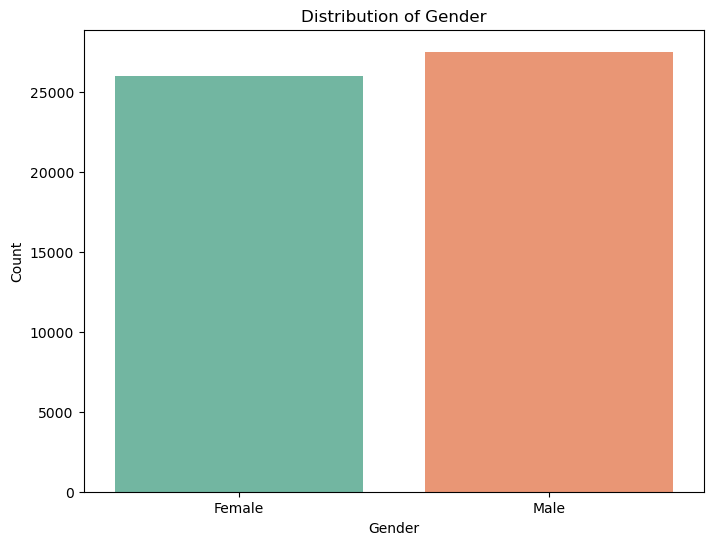

Count of each gender:
Gender
Male      27499
Female    26004
Name: count, dtype: int64

Proportion of each gender (%):
Gender
Male      51.397118
Female    48.602882
Name: proportion, dtype: float64


In [23]:
# Getting the count of each gender
gender_counts = df['Gender'].value_counts()

# Getting the proportion of each gender in percentage.
gender_proportions = df['Gender'].value_counts(normalize=True) * 100

# Visualizing Gender Distribution.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print('Count of each gender:')
print(gender_counts)
print("\nProportion of each gender (%):")
print(gender_proportions)

## Marital Status Distribution Analysis

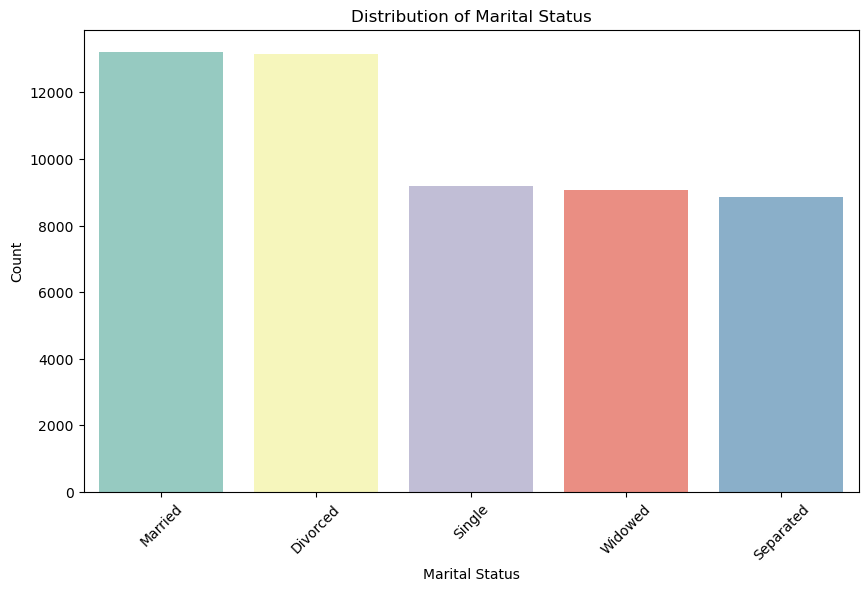

Count of each marital status:
Marital Status
Married      13219
Divorced     13151
Single        9195
Widowed       9077
Separated     8861
Name: count, dtype: int64

Proportion of each marital status (%):
Marital Status
Married      24.707026
Divorced     24.579930
Single       17.185952
Widowed      16.965404
Separated    16.561688
Name: proportion, dtype: float64


In [24]:
# Getting the count for each marital status in percentage.
marital_counts = df['Marital Status'].value_counts()

# Sorting the counts in descending order.
marital_counts_sorted = marital_counts.sort_values(ascending=False)

# Proportion for each marital status.
marital_proportions = df['Marital Status'].value_counts(normalize=True) * 100

# Visualize marital status distribution.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital Status', order=marital_counts_sorted.index, palette='Set3')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotating the x-axis for better readability
plt.show()

print("Count of each marital status:")
print(marital_counts)
print("\nProportion of each marital status (%):")
print(marital_proportions)

## Education Level Analysis

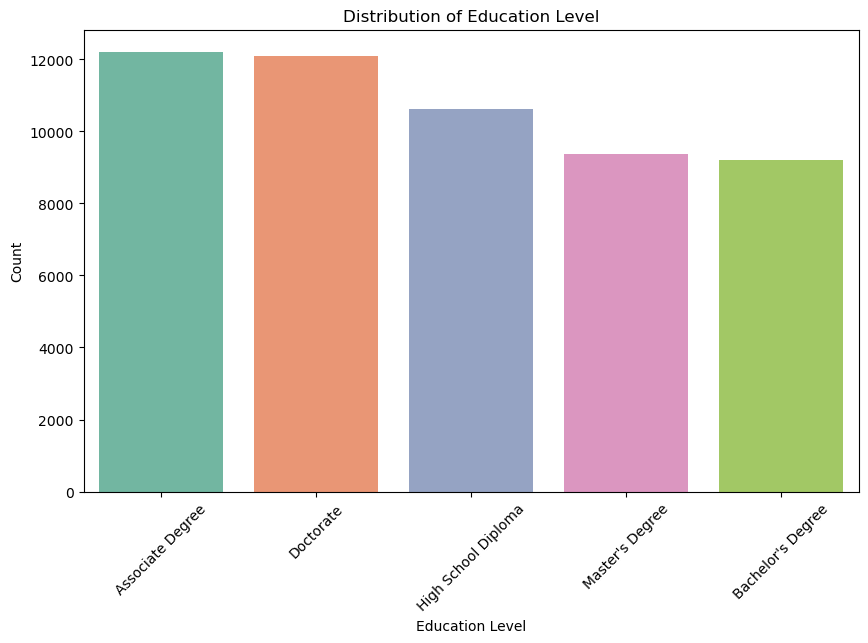

Count of each education level:
Education Level
Associate Degree       12213
Doctorate              12103
High School Diploma    10607
Master's Degree         9366
Bachelor's Degree       9214
Name: count, dtype: int64

Proportion of each education level (%):
Education Level
Associate Degree       22.826757
Doctorate              22.621161
High School Diploma    19.825057
Master's Degree        17.505560
Bachelor's Degree      17.221464
Name: proportion, dtype: float64


In [25]:
# Count of each education level
education_counts = df['Education Level'].value_counts()

# Sorting the counts in descending order.
education_counts_sorted = education_counts.sort_values(ascending=False)

# Proportion of each education level
education_proportions = df['Education Level'].value_counts(normalize=True) * 100  # Convert to percentage

# Visualize education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education Level', order=education_counts_sorted.index, palette='Set2')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print("Count of each education level:")
print(education_counts)
print("\nProportion of each education level (%):")
print(education_proportions)


## Geographical Distribution Analysis

Count of each geographic location:
Geographic Information
Lakshadweep                    2140
Himachal Pradesh               1963
Bihar                          1962
Haryana                        1931
Arunachal Pradesh              1903
Gujarat                        1895
Uttar Pradesh                  1855
Uttarakhand                    1758
Delhi                          1756
Madhya Pradesh                 1710
Andaman and Nicobar Islands    1678
Sikkim                         1654
Goa                            1605
Jharkhand                      1578
Nagaland                       1529
Daman and Diu                  1512
Mizoram                        1472
West Bengal                    1464
Assam                          1460
Chhattisgarh                   1451
Meghalaya                      1447
Andhra Pradesh                 1431
Maharashtra                    1428
Dadra and Nagar Haveli         1403
Manipur                        1391
Tripura                        1377
Chandi

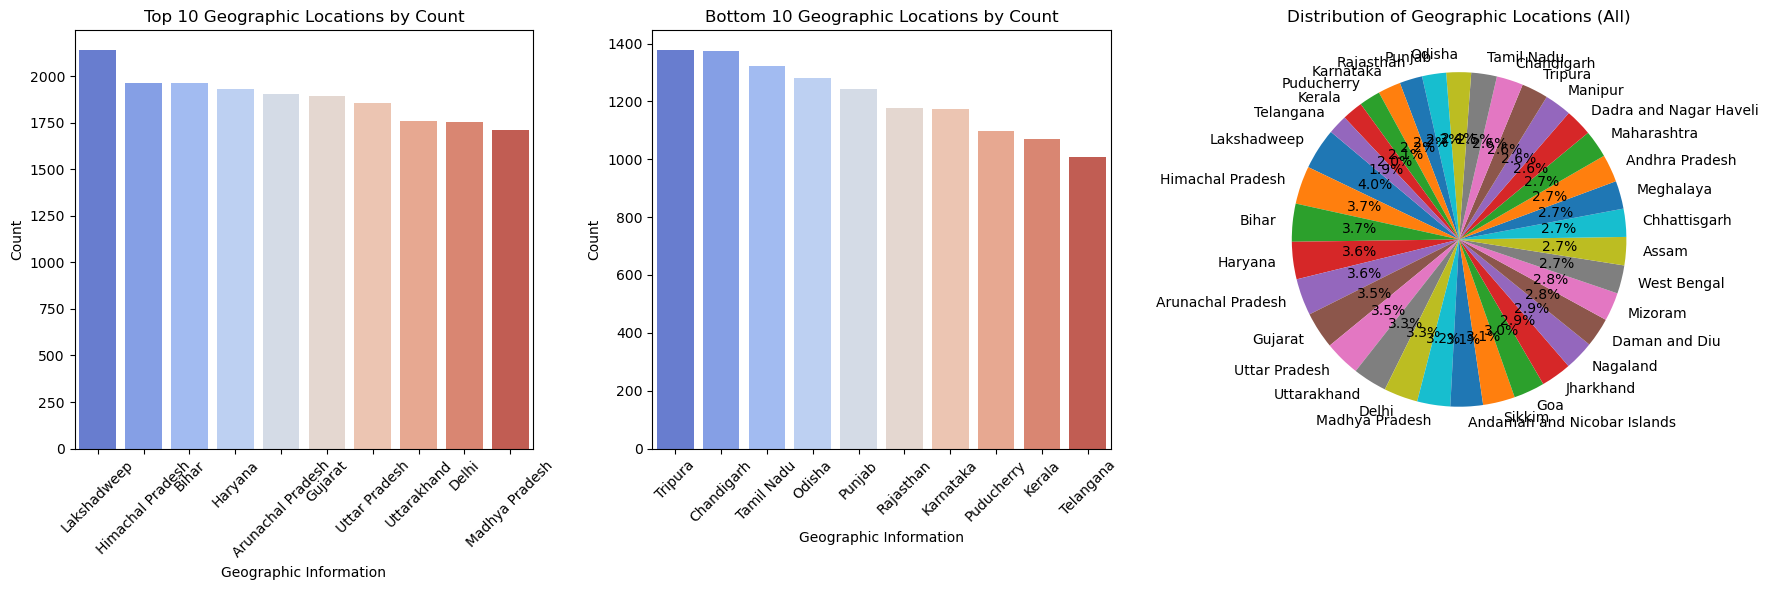

In [26]:
# Count of each geographic location
geographic_counts = df['Geographic Information'].value_counts()

# Proportion of each geographic location
geographic_proportions = df['Geographic Information'].value_counts(normalize=True) * 100  # Convert to percentage


# Assuming your dataset has a column 'Geographic Information' containing location names

# Get the top 10 and bottom 10 geographic locations by count
top_10_locations = df['Geographic Information'].value_counts().head(10)
bottom_10_locations = df['Geographic Information'].value_counts().tail(10)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Subplot 1: Bar plot of top 10 locations
sns.countplot(data=df[df['Geographic Information'].isin(top_10_locations.index)], 
              x='Geographic Information', palette='coolwarm', order=top_10_locations.index, ax=axes[0])
axes[0].set_title('Top 10 Geographic Locations by Count')
axes[0].set_xlabel('Geographic Information')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Subplot 2: Bar plot of bottom 10 locations
sns.countplot(data=df[df['Geographic Information'].isin(bottom_10_locations.index)], 
              x='Geographic Information', palette='coolwarm', order=bottom_10_locations.index, ax=axes[1])
axes[1].set_title('Bottom 10 Geographic Locations by Count')
axes[1].set_xlabel('Geographic Information')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Subplot 3: Pie chart of all locations
all_locations_counts = df['Geographic Information'].value_counts()
axes[2].pie(all_locations_counts, labels=all_locations_counts.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Distribution of Geographic Locations (All)')

print("Count of each geographic location:")
print(geographic_counts)
print("\nProportion of each geographic location (%):")
print(geographic_proportions)

plt.tight_layout()
plt.show()

## Occupational Analysis.

Count of each occupation:
Occupation
Salesperson     7919
Entrepreneur    6636
Teacher         5906
Manager         5803
Lawyer          5775
Engineer        5704
Artist          5666
Doctor          5573
Nurse           4521
Name: count, dtype: int64

Proportion of each occupation (%):


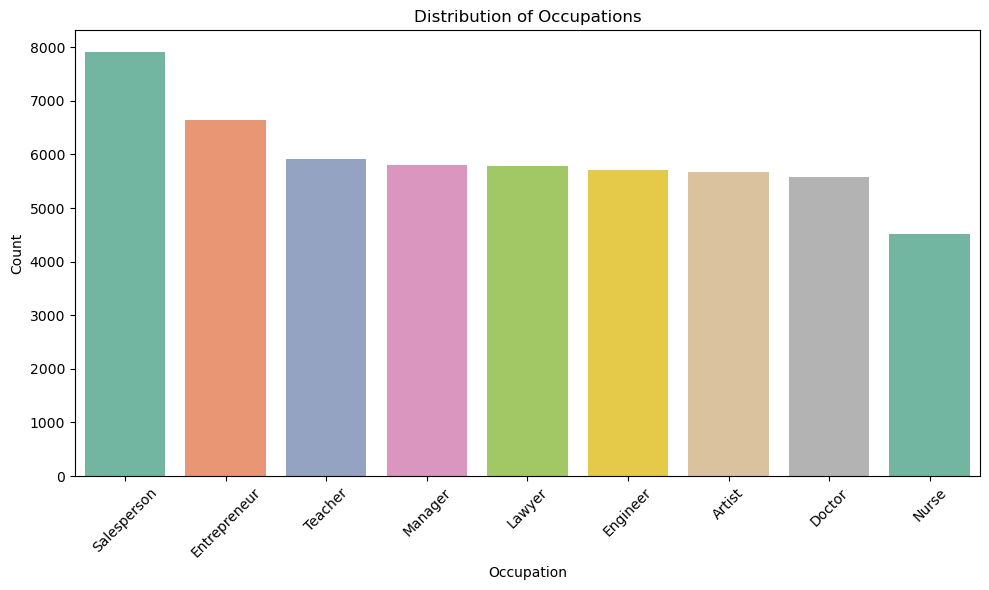

In [27]:
# Getting the counts of each occupation.
occupation_counts = df['Occupation'].value_counts()

# Getting the proportion of each occupation.
occupation_proportions = df['Occupation'].value_counts(normalize=True) * 100

# Visualizing the occupation distribution.
plt.figure(figsize=(10, 6))

# Bar plot of count for each occupation.
sns.countplot(data=df, x="Occupation", palette="Set2", order=occupation_counts.index)
plt.title("Distribution of Occupations")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45) # Rotating the x-axis labels for better readability.

# Display count and th proportion information.
print("Count of each occupation:")
print(occupation_counts)
print("\nProportion of each occupation (%):")

plt.tight_layout()
plt.show()

## Income Level Analysis.

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


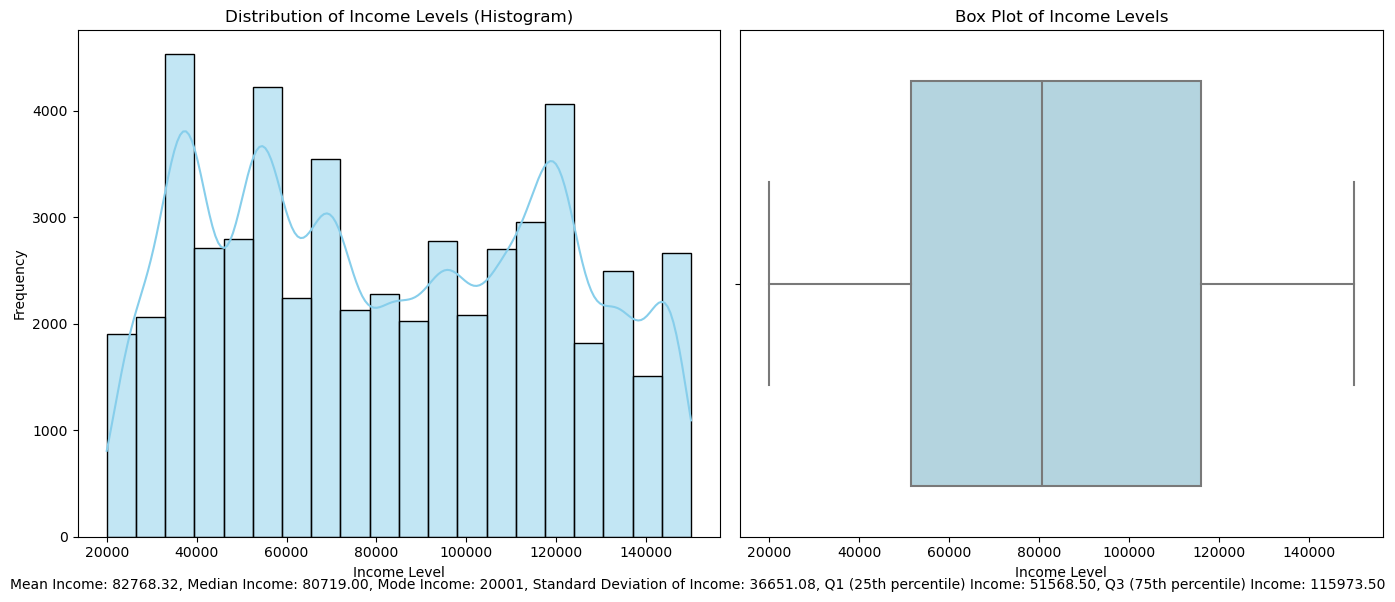

In [28]:
# Calculating the Summary Statistics.
mean_income = df['Income Level'].mean()
median_income = df['Income Level'].median()
mode_income = df['Income Level'].mode()[0] # Because mode might have multiple values so we are taking the first one.
std_income = df['Income Level'].std()
q1_income = df['Income Level'].quantile(0.25)
q3_income = df['Income Level'].quantile(0.75)


# Visualize the distributions - creating the subplots.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram
sns.histplot(data=df, x='Income Level', bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Income Levels (Histogram)')
axes[0].set_xlabel('Income Level')
axes[0].set_ylabel('Frequency')

#Box plot
sns.boxplot(data=df, x='Income Level', color='lightblue', ax=axes[1])
axes[1].set_title('Box Plot of Income Levels')

# Summary statistics.
plt.figtext(0.5, 0.01, f"Mean Income: {mean_income:.2f}, Median Income: {median_income:.2f}, Mode Income: {mode_income}, Standard Deviation of Income: {std_income:.2f}, Q1 (25th percentile) Income: {q1_income:.2f}, Q3 (75th percentile) Income: {q3_income:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Behavioural Analysis.

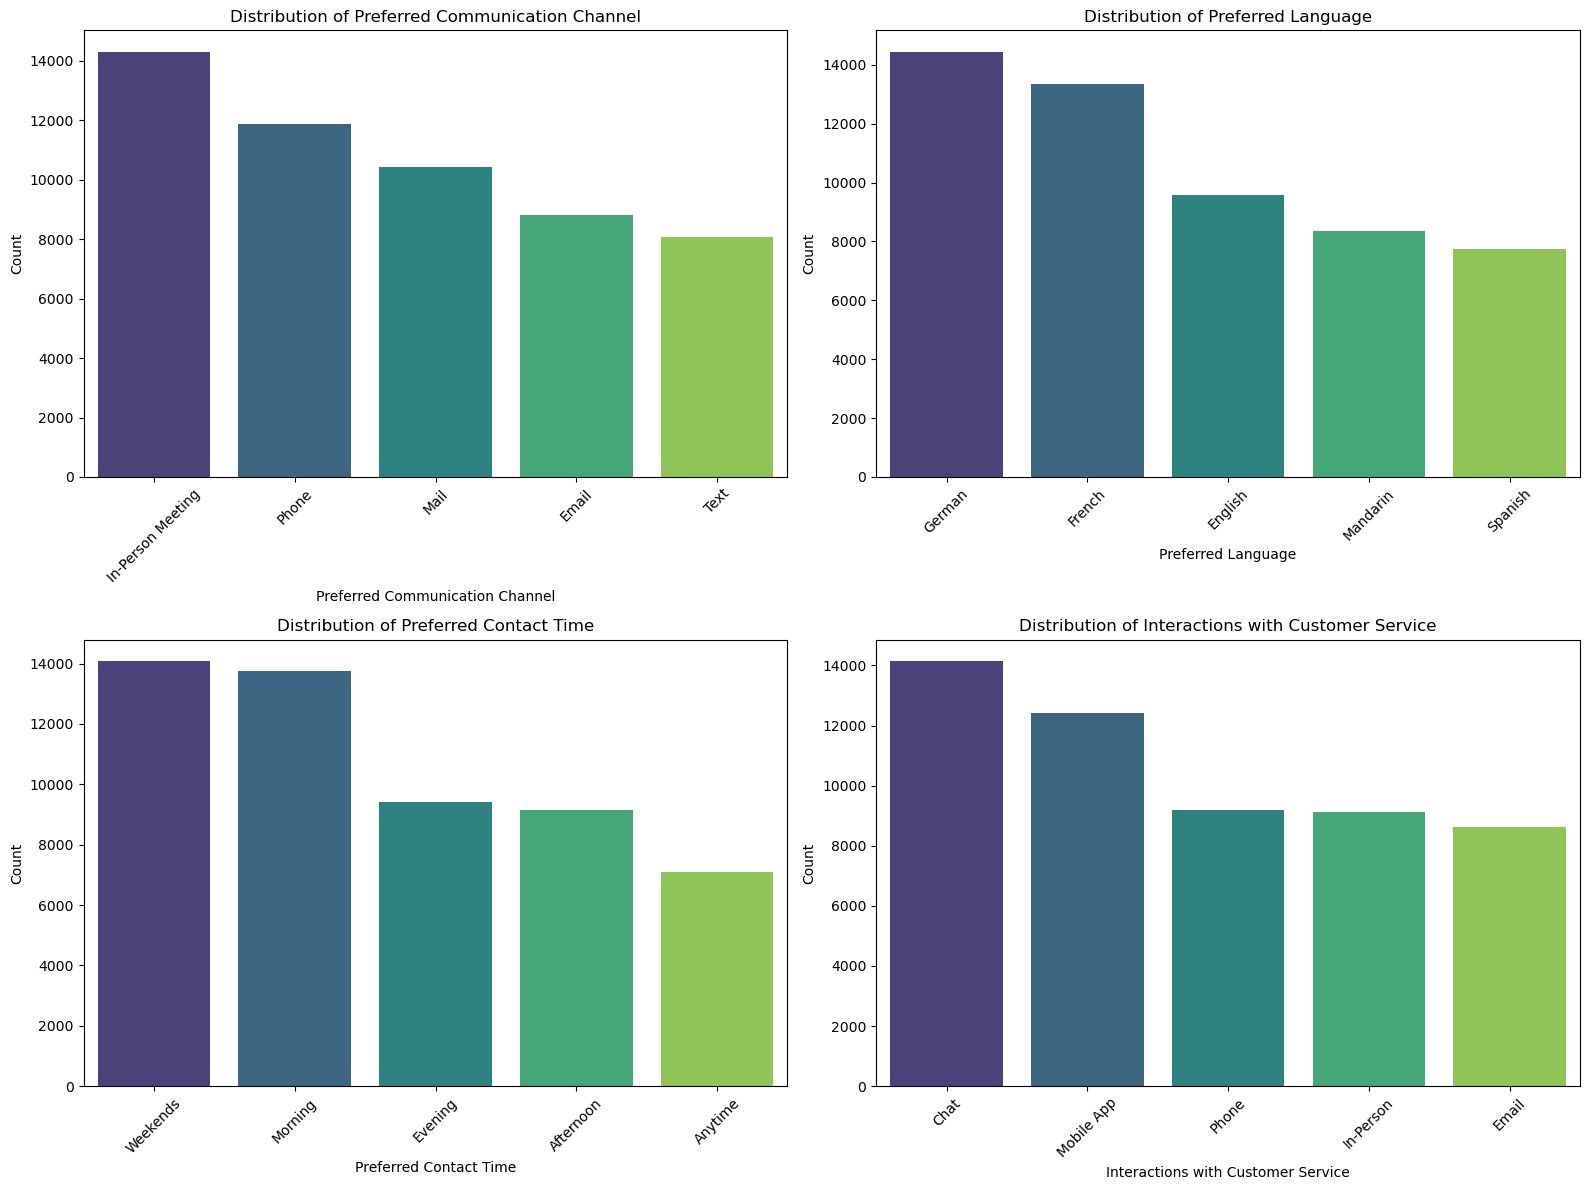

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns of interest
columns_of_interest = ['Preferred Communication Channel', 'Preferred Language', 'Preferred Contact Time', 'Interactions with Customer Service']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Iterate over each column
for i, col in enumerate(columns_of_interest):
    row_index = i // 2
    col_index = i % 2
    
    # Calculate value counts for the column
    value_counts = df[col].value_counts()
    
    # Check if the column contains categorical data
    if df[col].dtype == 'object':
        # Bar plot for categorical data
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis', ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f'Distribution of {col}')
        axes[row_index, col_index].set_xlabel(col)
        axes[row_index, col_index].set_ylabel('Count')
        axes[row_index, col_index].tick_params(axis='x', rotation=45)
    else:
        # Histogram for numerical data
        sns.histplot(data=df, x=col, bins=20, kde=True, color='skyblue', ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f'Distribution of {col}')
        axes[row_index, col_index].set_xlabel(col)
        axes[row_index, col_index].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Purchase Trends

In [30]:

# Convert the 'Purchase_Date' column to datetime format (assuming MM-DD-YYYY)
try:
  df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%m-%d-%Y')
except ValueError:  # Handle potential format errors
  print("Error: Invalid date format. Please check the data.")

# Now you can use the 'Purchase_Date' column for further analysis
# (e.g., filtering by date range, calculating time differences, etc.)

# Example: Print the first 5 rows of the DataFrame with the converted dates
print(df.head())


   Customer ID  Age  Gender Marital Status    Education Level  \
0        84966   23  Female        Married   Associate Degree   
1        95568   26    Male        Widowed          Doctorate   
2        10544   29  Female         Single   Associate Degree   
3        77033   20    Male       Divorced  Bachelor's Degree   
4        88160   25  Female      Separated  Bachelor's Degree   

  Geographic Information    Occupation  Income Level Behavioral Data  \
0                Mizoram  Entrepreneur         70541         policy5   
1                    Goa       Manager         54168         policy5   
2              Rajasthan  Entrepreneur         73899         policy5   
3                 Sikkim  Entrepreneur         63381         policy5   
4            West Bengal       Manager         38794         policy1   

  Purchase_Date  ... Insurance Products Owned Coverage Amount  Premium Amount  \
0    2018-04-10  ...                  policy2          366603            2749   
1    2018-11-0

In [31]:
df['Purchase_Date'].head(10)

0   2018-04-10
1   2018-11-06
2   2021-06-05
3   2018-09-02
4   2018-09-10
5   2020-09-19
6   2021-07-04
7   2021-11-01
8   2020-09-20
9   2020-04-24
Name: Purchase_Date, dtype: datetime64[ns]

In [33]:
df

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase_Date,...,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Age Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,2018-04-10,...,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5,21-30
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,2018-11-06,...,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5,21-30
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,2021-06-05,...,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3,21-30
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,2018-09-02,...,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3,21-30
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,2018-09-10,...,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,2019-01-01,...,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5,31-40
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,2021-05-18,...,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1,61-70
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,2018-11-27,...,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4,21-30
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,2021-06-04,...,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5,41-50


C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

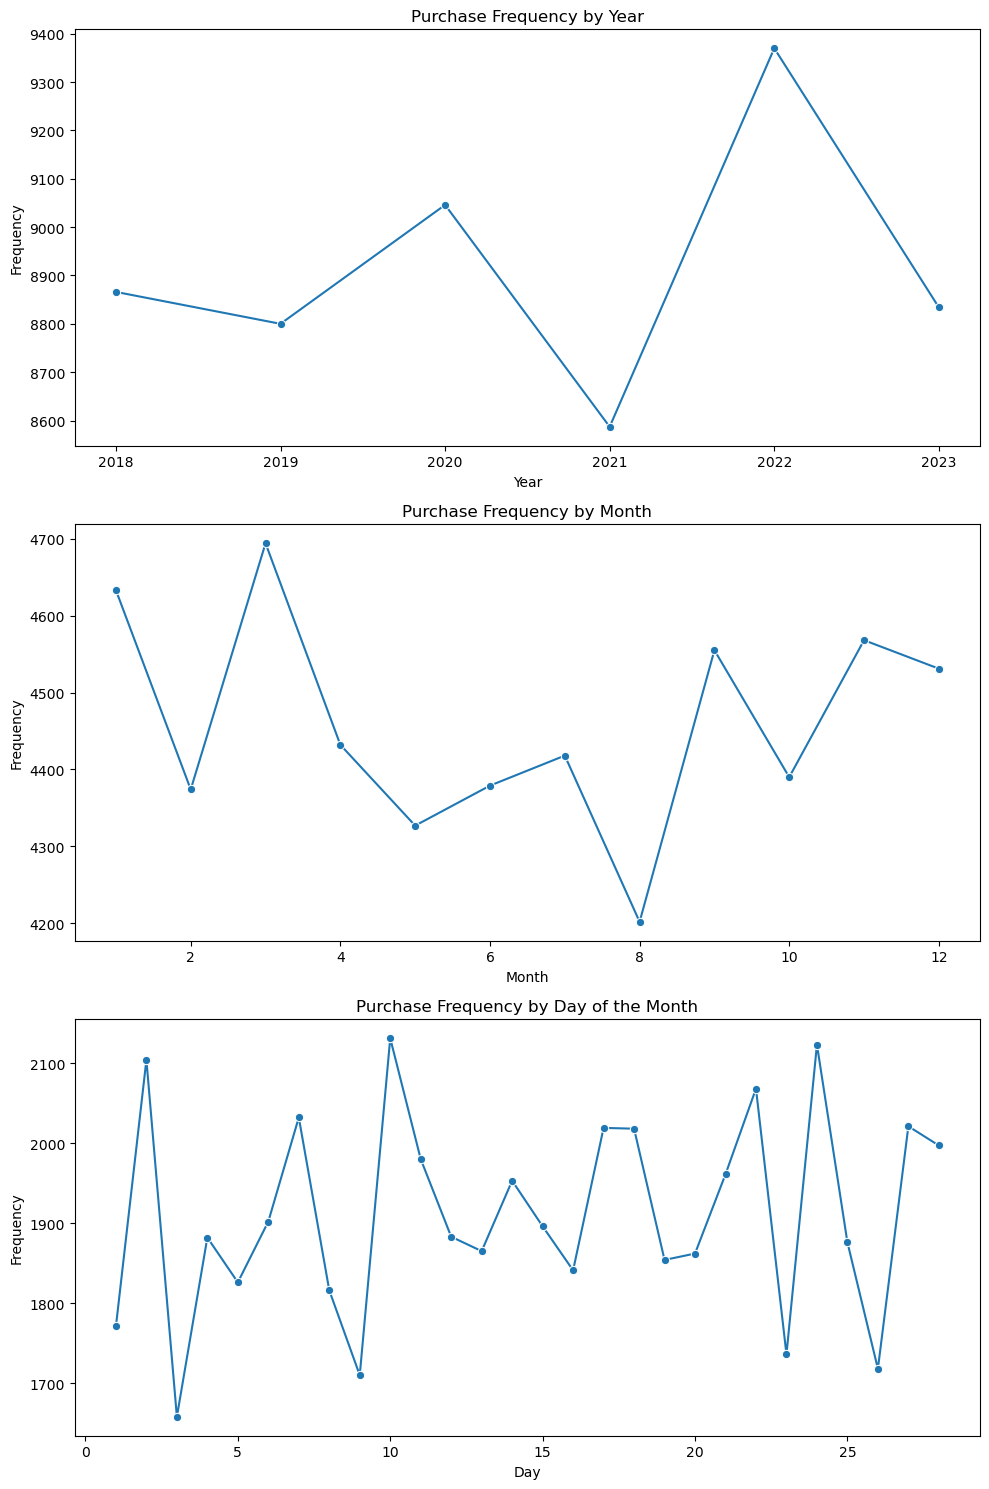

In [36]:
# Extract year, month, and day from the 'Purchase_Date' column
df['Year'] = df['Purchase_Date'].dt.year
df['Month'] = df['Purchase_Date'].dt.month
df['Day'] = df['Purchase_Date'].dt.day

# Group by year and count the number of purchases
purchase_by_year = df.groupby('Year').size()

# Group by month and count the number of purchases
purchase_by_month = df.groupby('Month').size()

# Group by day of the month and count the number of purchases
purchase_by_day = df.groupby('Day').size()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Line plot for purchase frequency by year
sns.lineplot(data=purchase_by_year, marker='o', ax=axes[0])
axes[0].set_title('Purchase Frequency by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

# Line plot for purchase frequency by month
sns.lineplot(data=purchase_by_month, marker='o', ax=axes[1])
axes[1].set_title('Purchase Frequency by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Frequency')

# Line plot for purchase frequency by day of the month
sns.lineplot(data=purchase_by_day, marker='o', ax=axes[2])
axes[2].set_title('Purchase Frequency by Day of the Month')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [37]:
df['Purchase_Date'].describe()

count                            53503
mean     2021-01-01 14:46:59.415733760
min                2018-01-01 00:00:00
25%                2019-07-10 00:00:00
50%                2021-01-01 00:00:00
75%                2022-06-28 00:00:00
max                2023-12-28 00:00:00
Name: Purchase_Date, dtype: object

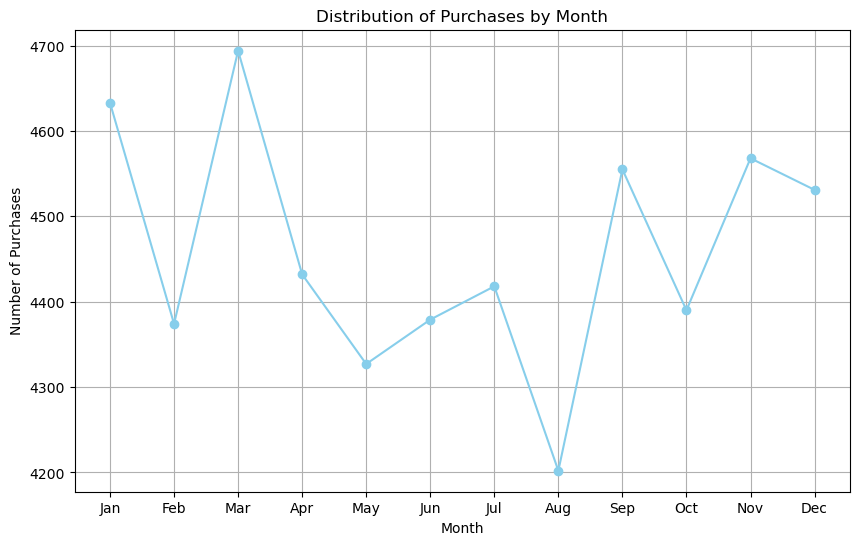

Month
1     4633
2     4374
3     4694
4     4432
5     4327
6     4379
7     4418
8     4202
9     4555
10    4390
11    4568
12    4531
dtype: int64


In [39]:
# Extract month from the 'Purchase_Date' column
df['Month'] = df['Purchase_Date'].dt.month

# Group purchases by month and count the number of purchases in each month
purchase_by_month = df.groupby('Month').size()

# Plot the distribution of purchases by month
plt.figure(figsize=(10, 6))
purchase_by_month.plot(marker='o', color='skyblue')
plt.title('Distribution of Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

print(purchase_by_month)

## Coverage, premium and policy Analysis

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


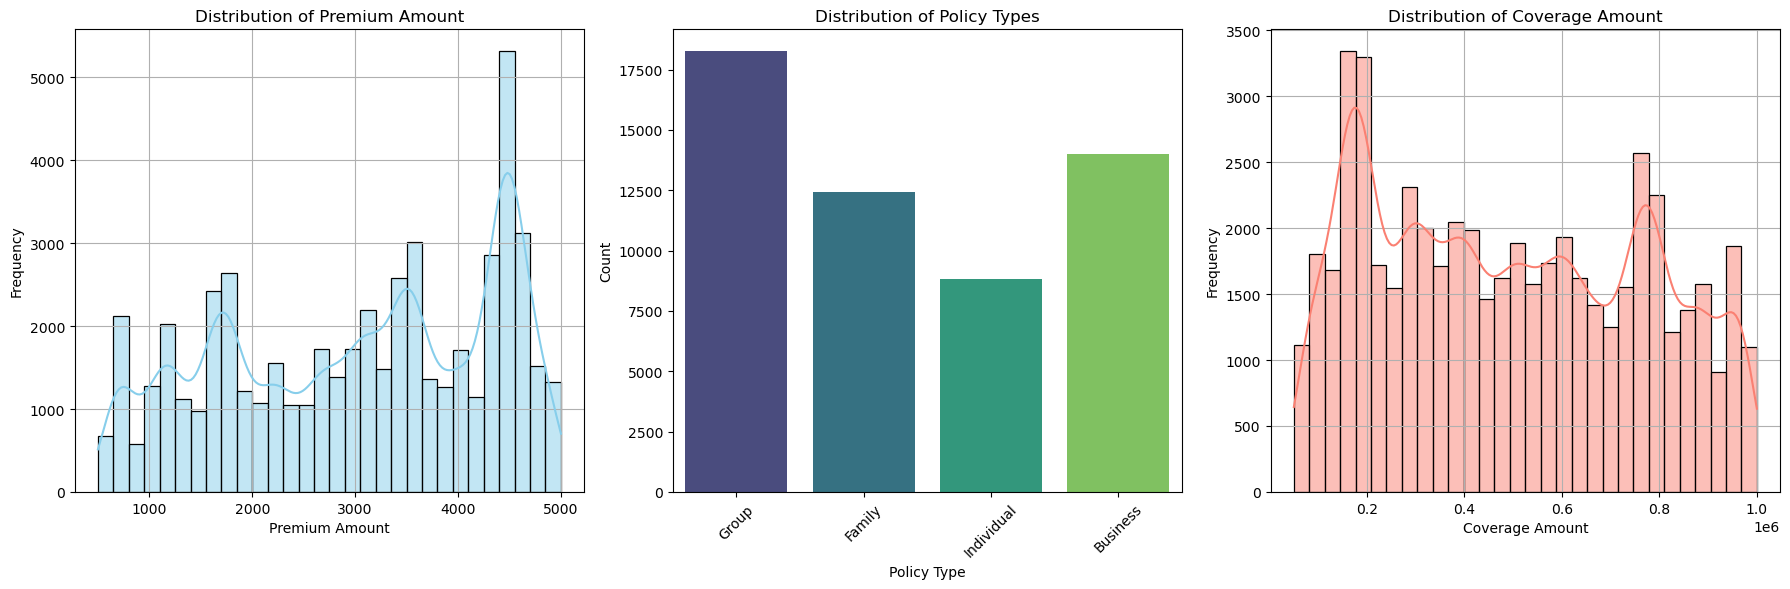

Summary Statistics for Premium Amount:
count    53503.000000
mean      3023.702447
std       1285.834295
min        500.000000
25%       1817.000000
50%       3194.000000
75%       4311.500000
max       5000.000000
Name: Premium Amount, dtype: float64

Summary Statistics for Coverage Amount:
count      53503.000000
mean      492580.789638
std       268405.505571
min        50001.000000
25%       249613.500000
50%       477261.000000
75%       739124.000000
max      1000000.000000
Name: Coverage Amount, dtype: float64


In [41]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Summary statistics for premium amount
premium_stats = df['Premium Amount'].describe()

# Plot the distribution of premium amount
sns.histplot(data=df, x='Premium Amount', bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Premium Amount')
axes[0].set_xlabel('Premium Amount')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Count of each policy type
policy_type_counts = df['Policy Type'].value_counts()

# Plot the distribution of policy types
sns.countplot(data=df, x='Policy Type', palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Policy Types')
axes[1].set_xlabel('Policy Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Summary statistics for coverage amount
coverage_stats = df['Coverage Amount'].describe()

# Plot the distribution of coverage amount
sns.histplot(data=df, x='Coverage Amount', bins=30, kde=True, color='salmon', ax=axes[2])
axes[2].set_title('Distribution of Coverage Amount')
axes[2].set_xlabel('Coverage Amount')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the summary statistics for premium and coverage amounts
print("Summary Statistics for Premium Amount:")
print(premium_stats)
print("\nSummary Statistics for Coverage Amount:")
print(coverage_stats)